#Problema 1
¿Cuáles  son  las  limitaciones  de  one  hot  encoding  y  por  qué  noes  recomendable como  método  de codificación  para  aplicaciones  de  procesamiento  de  lenguaje  natural?

Explica  el  concepto  de Word embedding y menciona dos técnicas de Word embedding. Incluye tus respuestas en una celda de texto(markdown cell).

1. Las limitaciones de One Hot Encoding, es que todo lo convierte a 1 o 0, por lo cuál si tenemos muchas caracteristicas que se necesiten convertir, nos quedaría una matriz muy grande de caracteristicas.

2. Word Embedding es el nombre que reciben las técnicas de aprendijaze en nlp en dónde las palabras o frases se convierten en vectores de números, los cuáles pueden ser representados. 

Técnica 1: Bag-of-Words

Técnica 2: Word2Vec

# Problema 2
El análisis de sentimiento consta en determinar si un texto tiene una connotación positiva o negativa, en la siguiente tarea van a construir un modelo que clasifique tweets. 

# Recolección  de datos:

Investiga cómo através  de  comandos  bash puedes descargar  un  set  de datos de Kaggledirecto a Google colab y descarga la siguiente base de datos:

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"davidcantmartnez","key":"793d8ad25e85c5897dd904122e31d1fd"}'}

In [ ]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 90% 73.0M/80.9M [00:00<00:00, 72.6MB/s]
100% 80.9M/80.9M [00:00<00:00, 104MB/s] 


In [ ]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


#Limpieza de datos:

La base de datos de Kaggle contiene los siguientes campos:
* target: the polarity of the tweet (0 = negative, 4 = positive)
* ids: The id of the tweet ( 2087)
* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* flag: The query (lyx). If there is no query, then this value is NO_QUERY.
* user: the user that tweeted (robotickilldozr)
* text: the text of the tweet (Lyx is cool)

El modelo a construir utilizará la columna de text para predecir la polaridad del tweet. Previo a utilizar los datos para entrenar al modelo, haz un submuestreo seleccionando 200000 tweets positivos y 200000, esos 400000 datos serán los que utilizarás. 

Adicionalmente efectúa la siguiente limpieza de datos:

* En la columna target, cambia la etiqueta de 4 por 1
* Elimina las columnas de ids, date, flag y user.
* Remueve todos los URLs presentes
* Remueve las referencias a otros usuarios de Twitter
* Utilizando NLTK, remueve todas las stopwords a excepción de aquellas que indiquen negación (i.e. no, not)

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# En la columna target, cambia la etiqueta de 4 por 1

In [ ]:
df["target"].replace({4:1}, inplace=True)

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df['target'].unique()

array([0, 1])

# Elimina las columnas de ids, date, flag y user.

In [ ]:
df.drop(['ids','date','flag','user'],axis=1,inplace=True)

In [ ]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# Remueve todos los URLs presentes

# Remueve las referencias a otros usuarios de Twitter

# Utilizando NLTK, remueve todas las stopwords a excepción de aquellas que indiquen negación (i.e. no, not)

In [ ]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopword=stopwords.words('english')
stopword.remove('not')
stopword.remove('no')
stopword=set(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopword)

{'hers', 'of', 'out', 'own', 'after', 'i', 'ain', 'only', 'and', "should've", "wasn't", "aren't", 'herself', 'both', 'if', 'them', 'couldn', 'when', "shouldn't", "it's", "haven't", 'then', 'with', 'any', 'each', "won't", 're', 'isn', 'between', 'up', 'where', "that'll", 'you', 'myself', "you're", 'had', 'she', "couldn't", "isn't", 'while', 'needn', 'themselves', 'over', 'which', 'other', 'is', 'that', 'or', 'we', 'your', 'the', 'him', 'having', 'y', 'were', 'so', 'same', "don't", 'didn', "mustn't", 'shan', 'wouldn', 'mustn', "needn't", 'mightn', "weren't", 'shouldn', 'don', 'from', "wouldn't", 'against', 'than', 'few', 'haven', 'under', 'o', "hadn't", 'was', 'to', 'our', "you've", 'should', 'weren', 'now', 'for', 'd', "doesn't", 'an', 's', 'ourselves', "didn't", 'until', 'itself', 'be', 'won', 'being', 'by', "you'll", 'about', 'aren', 'into', 'it', 'but', 'at', 'once', 'they', 'am', 'who', 'he', 'their', 'whom', 'ours', 'nor', 'what', 'does', 'because', 'have', 'during', 'wasn', 'why',

In [ ]:
def clean_tweet(data):
  data = str(data).lower()
  
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
  data = re.sub(text_cleaning_re, ' ' ,data)
  data = [word for word in data.split(' ') if word not in stopword]
  data=" ".join(data)
  #data = [stemmer.stem(word) for word in data.split(' ')]
  #data=" ".join(data)
  
  return data

In [ ]:
%%time
df['text'] = df['text'].apply(clean_tweet)

CPU times: user 16.3 s, sys: 267 ms, total: 16.5 s
Wall time: 16.6 s


In [ ]:
df.head()

,target,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many times ball managed save 50 rest g...
3,0,whole body feels itchy like fire
4,0,no not behaving mad see


# Sumbuestreo 

In [ ]:
negative_tweets = df[df['target'] == 0]
positive_tweets = df[df['target'] == 1]

In [ ]:
negative_tweets = negative_tweets.loc[np.random.choice(negative_tweets.index, 20000, replace=False)]

In [ ]:
positive_tweets = positive_tweets.loc[np.random.choice(positive_tweets.index, 20000, replace=False)]

In [ ]:
frames = [negative_tweets, positive_tweets]

In [ ]:
df = pd.concat(frames)

In [ ]:
df

,target,text
533159,0,saddest thing ever heard
446739,0,teenage sim toddler sim stuck sims3
484920,0,no sister gonna support staff told first cam...
757881,0,facebook boring lame
428731,0,wanted meet people lunchh butt canttt
...,...,...
1477248,1,getting excited wednesday saturday roll
950186,1,guys thank rock toni okay knew say something u...
968335,1,way get prints 30 minutes buy leave ship tomor...
1243093,1,yep


# Procesamiento de datos:

Una forma de procesar texto es convertir cada una de las palabras en tokens y posteriormente utilizar una técnica de word embedding para convertirlos en vectores numéricos:

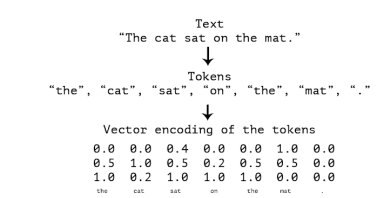

Para entender cómo se lleva a cabo este proceso, primero harás un ejercicio con un set de datos 
pequeño y posteriormente lo escalarás a todos los tweets que recolectaste. Inicia investigando 
las funcionalidades de la clase Tokenizer:
                            https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()

In [ ]:
text_example = ["In a hole in the ground there lived a hobbit.",
 "It was the best of times, it was the worst of times"]
tokenizer.fit_on_texts(text_example)

In [ ]:
tokenizer.word_index

{'a': 3,
 'best': 13,
 'ground': 9,
 'hobbit': 12,
 'hole': 8,
 'in': 2,
 'it': 4,
 'lived': 11,
 'of': 6,
 'the': 1,
 'there': 10,
 'times': 7,
 'was': 5,
 'worst': 14}

In [ ]:
sequence = tokenizer.texts_to_sequences(text_example)

In [ ]:
pad_sequences(sequence)

array([[ 0,  0,  2,  3,  8,  2,  1,  9, 10, 11,  3, 12],
       [ 4,  5,  1, 13,  6,  7,  4,  5,  1, 14,  6,  7]], dtype=int32)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-07-18 21:55:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-18 21:55:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-18 21:55:02--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
embedding_matrix = np.zeros((15,100))

In [ ]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
f = open("glove.6B.100d.txt", "r")

In [ ]:
embedding_index = {}

for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

print('Found word vectors', len(embedding_index))

Found word vectors 400000


In [ ]:
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

# Ahora utilizando la base de tweets que descargaste, replica los pasos de tokenizar y rellenar los datos

Además genera una embedding_matrix para la capa de embedding de tu modelo. 

La matriz de embeddings constrúyela a partir de glove.6B.300d.txt

# Dividir antes en train y test

In [ ]:
from sklearn.model_selection import train_test_split

train, test  = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train.head()

,target,text
409082,0,deeply regret getting kicked cd got really obs...
435723,0,wish hp cm1015 handle texture one added expe...
695150,0,going wake baby actually not really baby anymore
783407,0,wants last essay go away wanna
1222741,1,new desk idea ever get bored not likely baby...


In [ ]:
test.head()

,target,text
1039517,1,great opening night bed time
743471,0,uhh headache feels like head explode
1102170,1,cute
777655,0,home school watching mcfly loud table vibratin...
1230146,1,ordered new computer morning free ipod


In [ ]:
train['text'] = train['text'].apply(str)
test['text'] = test['text'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x_train = train.text.to_numpy()
y_train= train.target.to_numpy()
x_test= test.text.to_numpy()
y_test= test.target.to_numpy()

In [ ]:
max_seq_len = 30
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index 
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size', vocab_size)

Vocabulary Size 28545


In [ ]:
X = tokenizer.texts_to_sequences(x_train)
X_train = pad_sequences(X,  maxlen=max_seq_len)
X = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(X,  maxlen=max_seq_len)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(32000, 30)
(8000, 30)


In [ ]:
print(len(tokenizer.word_index))

28544


In [ ]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(y_train.shape)
print(y_test.shape)

(32000, 1)
(8000, 1)


In [ ]:
f = open("glove.6B.300d.txt", "r")

embedding_index = {}

for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

print('Found word vectors', len(embedding_index))

Found word vectors 400000


In [ ]:
embedding_dim = 300

In [ ]:
words = ['house', 'tiktok', 'dog']

for i in words:
  test = embedding_index.get(i)
  if test is not None:
    print(i)

house
dog


In [ ]:
import tensorflow as tf

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                                           input_length=30, trainable=False)

#Construcción del modelo: 

Construye una red neuronal con las siguientes especificaciones. 
* Una capa de embedding seguida de una de LSTM, agrega también una capa de dropout y una capa de salida con función de activación sigmoid. 

* La función de costo debe ser “binary_crossentropy”, el 
optimizador “Adam” y la métrica de evaluación la exactitud. 

* Aquellos parámetros e híper parámetros que no fueron especificados quedan a criterio del programador. 

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

sequence_input = Input(shape=(30,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 30)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 30, 300)           8563500   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 30, 300)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 26, 64)            96064     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_29 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0   

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento: 
* Entrena el modelo por 10 épocas, con una distribución de datos del 80% para 
entrenamiento 20% para validación y usa un tamaño de lote de 128. 
* Aquellos parámetros e híper parámetros que no fueron especificados quedan a criterio del programador.


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 49s 180ms/step - loss: 0.5849 - accuracy: 0.6888 - val_loss: 0.5513 - val_accuracy: 0.7097
Epoch 2/10
250/250 [==============================] - 44s 177ms/step - loss: 0.5315 - accuracy: 0.7325 - val_loss: 0.5177 - val_accuracy: 0.7427
Epoch 3/10
250/250 [==============================] - 44s 176ms/step - loss: 0.4975 - accuracy: 0.7561 - val_loss: 0.5271 - val_accuracy: 0.7362
Epoch 4/10
250/250 [==============================] - 44s 176ms/step - loss: 0.4645 - accuracy: 0.7788 - val_loss: 0.5219 - val_accuracy: 0.7401
Epoch 5/10
250/250 [==============================] - 44s 177ms/step - loss: 0.4339 - accuracy: 0.7978 - val_loss: 0.5224 - val_accuracy: 0.7491
Epoch 6/10
250/250 [==============================] - 44s 177ms/step - loss: 0.4031 - accuracy: 0.8168 - val_loss: 0.5900 - val_accuracy: 0.7289
Epoch 7/10
250/250 [==============================] - 44s 176ms/step - loss: 0.3728 - accuracy: 0.8331 - val_loss: 0.5560 - val_ac

# Evaluación del modelo: 
* Grafica la exactitud de entrenamiento y validación de tu modelo con respecto a las épocas.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

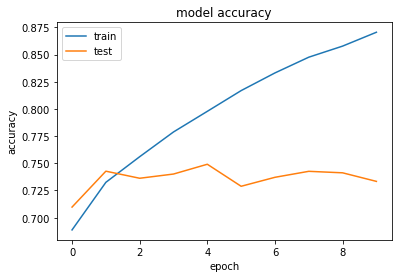

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Problema 3

El siguiente enlace de kaggle contiene una base de datos con noticias verdaderas y falsas.https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset Combina Fake.csv  y  True.csv en  un archivo llamado FOX_CNN_news.csv y  con  esos  datos construye un modelo  para  detectar si  una  noticia  es  confiable  o  no. Las únicas  especificaciones  solicitadas  es  que  el wordembedding a utilizar sea Fasttext y que el modelo contenga una capa de GRU.

In [4]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip fake-and-real-news-dataset.zip

Archive:  fake-and-real-news-dataset.zip
replace Fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace True.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


# Combina Fake.csv y True.csv en un archivo llamado FOX_CNN_news.csv

In [6]:
import pandas as pd

true_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')


In [7]:
true_data = true_data.assign(is_fake=0);
fake_data = fake_data.assign(is_fake=1);

In [8]:
true_data

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [9]:
frames = [true_data, fake_data]
merged = pd.concat(frames)
merged

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [10]:
merged.to_csv("FOX_CNN.csv", index=False)

In [24]:
df = pd.read_csv("FOX_CNN.csv")
df.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [12]:
import numpy as np, pandas as pd


from gensim.utils import simple_preprocess

In [28]:
df.drop(["title","subject","date"], axis=1, inplace=True)

In [14]:
df.head()

,text,is_fake
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip

--2021-07-19 02:04:11--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  40.6MB/s    in 16s     

2021-07-19 02:04:28 (40.4 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [45]:
df.head()

,text,is_fake
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [44]:
import re
import tqdm
stop_words = set(stopwords.words("english"))
def process_news(text):
    # Lower Case
    text = text.lower()
    # Remove stop words
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    # Remove mentions
    text = re.sub("@\S+", " ", text)
    # Romove URLs
    text = re.sub("https*\S+", " ", text)
    # Spaces
    text = re.sub('\s{2,}', " ", text)
    
    return text

In [46]:
processed_news = []
for row in tqdm.tqdm(range(len(x))):
    processed_news.append(process_news(str(df.text[row])))

100%|██████████| 44898/44898 [00:06<00:00, 6822.40it/s]


In [47]:
df.head()

,text,is_fake
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [48]:
from sklearn.model_selection import train_test_split

train, test  = train_test_split(df, test_size=0.2, random_state=42)

In [49]:
train['text'] = train['text'].apply(str)
test['text'] = test['text'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
x_train = train.text.to_numpy()
y_train= train.is_fake.to_numpy()
x_test= test.text.to_numpy()
y_test= test.is_fake.to_numpy()

In [35]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [50]:
max_seq_len = 30
tokenizer = Tokenizer()

In [51]:
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index 
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size', vocab_size)

Vocabulary Size 125499


In [52]:
X = tokenizer.texts_to_sequences(x_train)
X_train = pad_sequences(X,  maxlen=max_seq_len)
X = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(X,  maxlen=max_seq_len)

In [53]:
print(X_train.shape)
print(X_test.shape)

(35918, 30)
(8980, 30)


In [54]:
print(len(tokenizer.word_index))

125498


In [55]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(y_train.shape)
print(y_test.shape)

(35918, 1)
(8980, 1)


In [56]:
f = open("wiki-news-300d-1M.vec", "r")

In [57]:
embedding_index = {}

for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

print('Found word vectors', len(embedding_index))

Found word vectors 999995


In [60]:
embedding_dim = 300

In [61]:
import tensorflow as tf

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                                           input_length=30, trainable=False)

In [64]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0897    ,  0.016     , -0.0571    , ...,  0.1559    ,
        -0.0254    , -0.0259    ],
       [ 0.0495    ,  0.0411    ,  0.0041    , ...,  0.23710001,
        -0.0298    , -0.0284    ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [65]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

sequence_input = Input(shape=(30,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [66]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 300)           37649700  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 30, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 64)            96064     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0     

In [67]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [69]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
with tf.device("GPU:0"):
  history = model.fit(X_train, y_train, batch_size=128, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
281/281 [==============================] - 96s 215ms/step - loss: 0.1942 - accuracy: 0.9196 - val_loss: 0.1079 - val_accuracy: 0.9575
Epoch 2/10
281/281 [==============================] - 60s 215ms/step - loss: 0.1060 - accuracy: 0.9598 - val_loss: 0.0948 - val_accuracy: 0.9645
Epoch 3/10
281/281 [==============================] - 62s 219ms/step - loss: 0.0813 - accuracy: 0.9694 - val_loss: 0.0830 - val_accuracy: 0.9676
Epoch 4/10
281/281 [==============================] - 62s 220ms/step - loss: 0.0593 - accuracy: 0.9784 - val_loss: 0.0772 - val_accuracy: 0.9727
Epoch 5/10
281/281 [==============================] - 62s 220ms/step - loss: 0.0465 - accuracy: 0.9836 - val_loss: 0.0813 - val_accuracy: 0.9718
Epoch 6/10
281/281 [==============================] - 62s 219ms/step - loss: 0.0382 - accuracy: 0.9869 - val_loss: 0.0930 - val_accuracy: 0.9657
Epoch 7/10
281/281 [==============================] - 61s 218ms/step - loss: 0.0326 - accuracy: 0.9883 - val_loss: 0.0722 - val_ac

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

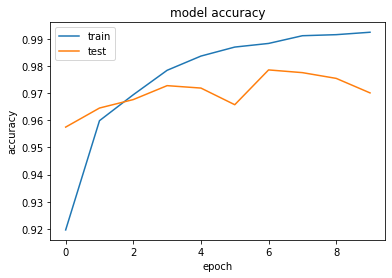

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()